## Application de GSP sur BMS1

In [2]:
import subprocess
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12


#### Analyse exploratoire

In [16]:
# %% Cell 2 - Analyse exploratoire BMS1
print("=" * 80)
print("ANALYSE EXPLORATOIRE - DATASET BMS1")
print("=" * 80)

def analyze_original_file(filename):
    """Analyse complète du fichier original"""
    print(" Lecture du fichier original...")
    
    sequences = []
    all_items = []
    sequence_lengths = []
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                items = [item for item in line.split() if item not in ['-1', '-2']]
                sequences.append(items)
                all_items.extend(items)
                sequence_lengths.append(len(items))
    
    total_sequences = len(sequences)
    total_items = len(all_items)
    unique_items = len(set(all_items))
    
    print(f" Statistiques générales:")
    print(f"   • Séquences: {total_sequences:,}")
    print(f"   • Items totaux: {total_items:,}")
    print(f"   • Items uniques: {unique_items:,}")
    print(f"   • Longueur moyenne: {np.mean(sequence_lengths):.2f} items")
    print(f"   • Longueur médiane: {np.median(sequence_lengths):.2f} items")
    
    return sequences, all_items, sequence_lengths

# Analyse du fichier
sequences, all_items, seq_lengths = analyze_original_file("BMS1.txt")
total_sequences = len(sequences)

# Top 20 items
print("\n Top 20 des items les plus fréquents:")
item_counts = Counter(all_items)
top_items = item_counts.most_common(20)
for i, (item, count) in enumerate(top_items, 1):
    percentage = (count / total_sequences) * 100
    print(f"   {i:2d}. Item {item}: {count:>5} séquences ({percentage:5.2f}%)")

ANALYSE EXPLORATOIRE - DATASET BMS1
 Lecture du fichier original...
 Statistiques générales:
   • Séquences: 251
   • Items totaux: 1,095
   • Items uniques: 584
   • Longueur moyenne: 4.36 items
   • Longueur médiane: 2.00 items

 Top 20 des items les plus fréquents:
    1. Item 55267:    13 séquences ( 5.18%)
    2. Item 55323:    12 séquences ( 4.78%)
    3. Item 55271:    12 séquences ( 4.78%)
    4. Item 55351:    12 séquences ( 4.78%)
    5. Item 56761:    12 séquences ( 4.78%)
    6. Item 203729:    10 séquences ( 3.98%)
    7. Item 55327:     9 séquences ( 3.59%)
    8. Item 222331:     9 séquences ( 3.59%)
    9. Item 55831:     8 séquences ( 3.19%)
   10. Item 55835:     8 séquences ( 3.19%)
   11. Item 55287:     8 séquences ( 3.19%)
   12. Item 222395:     8 séquences ( 3.19%)
   13. Item 56769:     8 séquences ( 3.19%)
   14. Item 55295:     7 séquences ( 2.79%)
   15. Item 55331:     7 séquences ( 2.79%)
   16. Item 55283:     7 séquences ( 2.79%)
   17. Item 84731:     7

#### Conversion au format SPMF

In [17]:
# %% Cell 3 - Conversion format SPMF CORRIGÉE
print("=" * 50)
print("CONVERSION FORMAT SPMF - CORRECTION")
print("=" * 50)

def convert_to_spmf_format_corrected():
    """Convertit BMS1.txt en format SPMF CORRECT"""
    print("🔄 Conversion avec format corrigé...")
    
    # Supprimer l'ancien fichier s'il existe
    if os.path.exists("BMS1_spmf.txt"):
        os.remove("BMS1_spmf.txt")
        print("🗑️ Ancien fichier BMS1_spmf.txt supprimé")
    
    input_count = 0
    output_count = 0
    
    with open("BMS1.txt", 'r') as fin, open("BMS1_spmf_corrected.txt", 'w') as fout:
        for line in fin:
            input_count += 1
            items = line.strip().split()
            if items:
                # ⚠️ CORRECTION : UN SEUL -2 à la fin !
                # Format SPMF correct : item1 item2 item3 -2
                cleaned_items = [item for item in items if item not in ['-1', '-2']]
                if cleaned_items:  # S'assurer qu'il reste des items après nettoyage
                    fout.write(' '.join(cleaned_items) + ' -2\n')
                    output_count += 1
    
    print(f"✅ Conversion CORRIGÉE terminée:")
    print(f"   • Lignes lues: {input_count}")
    print(f"   • Séquences converties: {output_count}")
    
    # Aperçu du fichier généré
    print("\n📄 Aperçu du fichier CORRIGÉ:")
    with open("BMS1_spmf_corrected.txt", 'r') as f:
        for i, line in enumerate(f):
            if i < 3:
                print(f"   Ligne {i+1}: {line.strip()}")
            else:
                break
    
    # Vérification
    print(f"\n🔍 Vérification format:")
    with open("BMS1_spmf_corrected.txt", 'r') as f:
        first_line = f.readline().strip()
        if first_line.endswith('-2') and not first_line.endswith('-2 -2'):
            print("   ✅ Format CORRECT: un seul -2 par ligne")
        else:
            print("   ❌ Format INCORRECT")

# Exécuter la conversion corrigée
convert_to_spmf_format_corrected()

CONVERSION FORMAT SPMF - CORRECTION
🔄 Conversion avec format corrigé...
✅ Conversion CORRIGÉE terminée:
   • Lignes lues: 252
   • Séquences converties: 251

📄 Aperçu du fichier CORRIGÉ:
   Ligne 1: 82475 84211 86919 86927 86943 -2
   Ligne 2: 56109 222699 -2
   Ligne 3: 55455 -2

🔍 Vérification format:
   ✅ Format CORRECT: un seul -2 par ligne


### Execution de GSP

In [18]:
# %% Cell 4 - GSP avec allocation mémoire augmentée
print("=" * 50)
print("GSP AVEC PLUS DE MÉMOIRE JAVA")
print("=" * 50)

def run_gsp_with_memory():
    """Exécute GSP avec allocation mémoire augmentée"""
    
    if not os.path.exists("BMS1_spmf_corrected.txt"):
        print("❌ Fichier BMS1_spmf_corrected.txt non trouvé")
        return False
    
    # Paramètres conservateurs
    min_support = 0.001       # Support PLUS ÉLEVÉ pour réduire la mémoire
    show_sequence_ids = "false"
    max_sequence_length = 5   # Longueur RÉDUITE
    
    print("🚀 Lancement GSP avec mémoire augmentée...")
    print(f"   • Support: {min_support} (plus élevé pour réduire mémoire)")
    print(f"   • Longueur max: {max_sequence_length} (réduite)")
    print(f"   • Mémoire Java: -Xmx4G (4GB)")
    
    # ⚠️ AJOUT DE MÉMOIRE JAVA :
    command = [
        'java', '-Xmx4G', '-jar', 'spmf.jar', 'run',  # ⚠️ -Xmx4G pour 4GB de RAM
        'GSP', 
        'BMS1_spmf_corrected.txt',
        'output_gsp.txt', 
        str(min_support),
        show_sequence_ids,
        str(max_sequence_length)
    ]
    
    try:
        print("⏳ Exécution en cours (peut être long)...")
        result = subprocess.run(command, capture_output=True, text=True, timeout=600)  # Timeout 10min
        
        print(f"📊 Code retour: {result.returncode}")
        
        if result.stdout:
            print("📄 Sortie SPMF:")
            print(result.stdout)
        
        if result.returncode == 0:
            if os.path.exists('output_gsp.txt'):
                file_size = os.path.getsize('output_gsp.txt')
                if file_size > 0:
                    with open('output_gsp.txt', 'r') as f:
                        lines = f.readlines()
                    
                    print(f"✅ SUCCÈS AVEC MÉMOIRE AUGMENTÉE!")
                    print(f"   • Motifs trouvés: {len(lines)}")
                    print(f"   • Taille: {file_size} octets")
                    
                    # Aperçu
                    print(f"   • Aperçu (3 premiers motifs):")
                    for i, line in enumerate(lines[:3]):
                        print(f"      {i+1}. {line.strip()}")
                    
                    return True
                else:
                    print("❌ Fichier vide")
                    return False
            else:
                print("❌ Fichier non créé")
                return False
        else:
            print(f"❌ Erreur mémoire persistante")
            if result.stderr:
                print(f"   Détails: {result.stderr}")
            return False
            
    except subprocess.TimeoutExpired:
        print("⏰ Timeout - Trop long même avec plus de mémoire")
        return False
    except Exception as e:
        print(f"💥 Exception: {e}")
        return False

# Essai avec mémoire augmentée
gsp_success = run_gsp_with_memory()

GSP AVEC PLUS DE MÉMOIRE JAVA
🚀 Lancement GSP avec mémoire augmentée...
   • Support: 0.001 (plus élevé pour réduire mémoire)
   • Longueur max: 5 (réduite)
   • Mémoire Java: -Xmx4G (4GB)
⏳ Exécution en cours (peut être long)...
📊 Code retour: 0
📄 Sortie SPMF:
>/home/mlee/Documents/semestre1/INF4117/TP/Annalyse_exploratrice_Wine/Extraction_des_regles/GSP/spmf.jar
=============  Algorithm - STATISTICS =============
 Total time ~ 5355 ms
 Frequent sequences count : 584
 Max memory (mb):459.60254669189453


✅ SUCCÈS AVEC MÉMOIRE AUGMENTÉE!
   • Motifs trouvés: 584
   • Taille: 10040 octets
   • Aperçu (3 premiers motifs):
      1. 55267 -1 #SUP: 13
      2. 55271 -1 #SUP: 12
      3. 55275 -1 #SUP: 4


### Analyse des resultats GSP

In [19]:
# %% Cell 5 - Analyse résultats GSP
print("=" * 50)
print("ANALYSE RÉSULTATS GSP")
print("=" * 50)

def analyze_gsp_results():
    """Analyse détaillée des résultats GSP"""
    
    if not os.path.exists('output_gsp.txt'):
        print(" Fichier output_gsp.txt non trouvé")
        return
    
    patterns = []
    supports = []
    pattern_lengths = []
    
    print("📋 Lecture des résultats...")
    with open('output_gsp.txt', 'r') as f:
        for line in f:
            line = line.strip()
            if line and '#SUP:' in line:
                pattern_part, sup_part = line.rsplit('#SUP:', 1)
                pattern = pattern_part.strip()
                support = int(sup_part.strip())
                
                patterns.append(pattern)
                supports.append(support)
                
                # Calcul longueur
                items = [item for item in pattern.split() if item != '-1']
                pattern_lengths.append(len(items))
    
    if not patterns:
        print(" Aucun motif trouvé dans le fichier")
        return
    
    print(f"📊 Statistiques GSP:")
    print(f"   • Motifs trouvés: {len(patterns):,}")
    print(f"   • Support moyen: {np.mean(supports):.1f}")
    print(f"   • Support médian: {np.median(supports):.1f}")
    print(f"   • Support max: {np.max(supports)}")
    print(f"   • Support min: {np.min(supports)}")
    print(f"   • Longueur moyenne: {np.mean(pattern_lengths):.2f} items")
    
    # Top 10 motifs
    print("\n Top 10 des motifs GSP:")
    pattern_data = list(zip(patterns, supports, pattern_lengths))
    pattern_data.sort(key=lambda x: x[1], reverse=True)
    
    for i, (pattern, sup, length) in enumerate(pattern_data[:10], 1):
        percentage = (sup / total_sequences) * 100
        print(f"   {i:2d}. Support: {sup:>5} ({percentage:5.2f}%) | Long: {length} | {pattern}")
    
    return patterns, supports, pattern_lengths

# Exécuter l'analyse
gsp_patterns, gsp_supports, gsp_lengths = analyze_gsp_results()

ANALYSE RÉSULTATS GSP
📋 Lecture des résultats...
📊 Statistiques GSP:
   • Motifs trouvés: 584
   • Support moyen: 1.9
   • Support médian: 1.0
   • Support max: 13
   • Support min: 1
   • Longueur moyenne: 1.00 items

 Top 10 des motifs GSP:
    1. Support:    13 ( 5.18%) | Long: 1 | 55267 -1
    2. Support:    12 ( 4.78%) | Long: 1 | 55271 -1
    3. Support:    12 ( 4.78%) | Long: 1 | 55323 -1
    4. Support:    12 ( 4.78%) | Long: 1 | 55351 -1
    5. Support:    12 ( 4.78%) | Long: 1 | 56761 -1
    6. Support:    10 ( 3.98%) | Long: 1 | 203729 -1
    7. Support:     9 ( 3.59%) | Long: 1 | 55327 -1
    8. Support:     9 ( 3.59%) | Long: 1 | 222331 -1
    9. Support:     8 ( 3.19%) | Long: 1 | 55287 -1
   10. Support:     8 ( 3.19%) | Long: 1 | 55831 -1


### Visualisation GSP

VISUALISATIONS RÉSULTATS GSP
📈 Génération des graphiques...


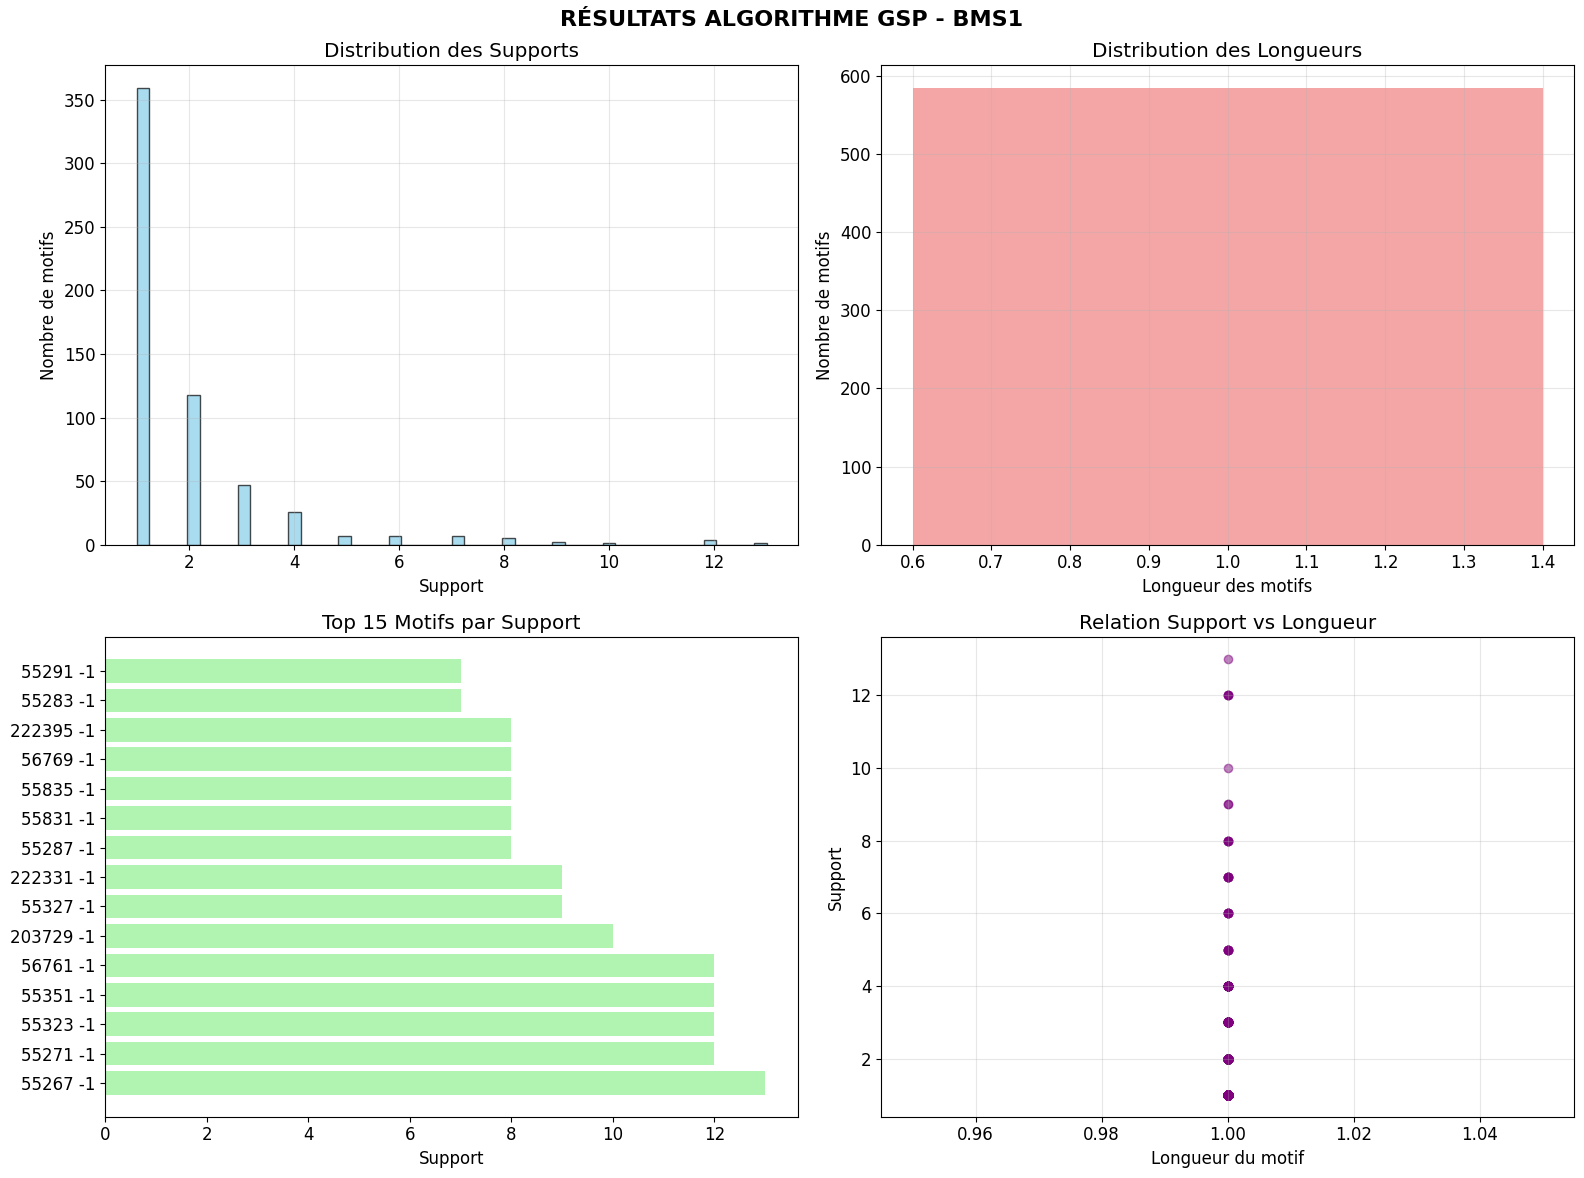

✅ Graphiques générés!


In [20]:
# %% Cell 6 - Visualisations résultats GSP
print("=" * 50)
print("VISUALISATIONS RÉSULTATS GSP")
print("=" * 50)

def create_gsp_visualizations(patterns, supports, pattern_lengths):
    """Crée des graphiques pour les résultats GSP"""
    
    if not patterns:
        print("❌ Aucune donnée à visualiser")
        return
    
    print("📈 Génération des graphiques...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('RÉSULTATS ALGORITHME GSP - BMS1', fontsize=16, fontweight='bold')
    
    # Graphique 1: Distribution des supports
    axes[0,0].hist(supports, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_xlabel('Support')
    axes[0,0].set_ylabel('Nombre de motifs')
    axes[0,0].set_title('Distribution des Supports')
    axes[0,0].grid(True, alpha=0.3)
    
    # Graphique 2: Distribution des longueurs
    length_counts = Counter(pattern_lengths)
    axes[0,1].bar(length_counts.keys(), length_counts.values(), color='lightcoral', alpha=0.7)
    axes[0,1].set_xlabel('Longueur des motifs')
    axes[0,1].set_ylabel('Nombre de motifs')
    axes[0,1].set_title('Distribution des Longueurs')
    axes[0,1].grid(True, alpha=0.3)
    
    # Graphique 3: Top 15 motifs
    top_15 = sorted(zip(patterns, supports), key=lambda x: x[1], reverse=True)[:15]
    top_patterns, top_supports = zip(*top_15)
    truncated = [p[:35] + '...' if len(p) > 35 else p for p in top_patterns]
    
    y_pos = np.arange(len(truncated))
    axes[1,0].barh(y_pos, top_supports, color='lightgreen', alpha=0.7)
    axes[1,0].set_yticks(y_pos)
    axes[1,0].set_yticklabels(truncated)
    axes[1,0].set_xlabel('Support')
    axes[1,0].set_title('Top 15 Motifs par Support')
    
    # Graphique 4: Relation support vs longueur
    axes[1,1].scatter(pattern_lengths, supports, alpha=0.5, color='purple')
    axes[1,1].set_xlabel('Longueur du motif')
    axes[1,1].set_ylabel('Support')
    axes[1,1].set_title('Relation Support vs Longueur')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Graphiques générés!")

# Créer les visualisations
if 'gsp_patterns' in locals() and gsp_patterns:
    create_gsp_visualizations(gsp_patterns, gsp_supports, gsp_lengths)
else:
    print("❌ Données GSP non disponibles")